Here are probable business questions your client may want answered:

1. Sales Performance
💰 Which product categories or items generate the highest revenue?

📈 Which months or seasons see the highest/lowest sales?

2. Customer Behavior
🧍 Who are the top spending customers?

🔁 How frequently do customers shop?

🧾 Are certain payment methods preferred by high-value customers?

3. Product & Pricing Analysis
📊 Which items are most/least sold?

💡 How do discounts affect sales volume and revenue?

4. Channel/Location Insights
🌍 What’s the revenue split between Online vs Offline sales?

🛒 Do in-store vs online customers behave differently (e.g. spend more, prefer certain products)?

5. Marketing & Discounts
🎯 Did discounts lead to increased sales or cannibalize revenue?

💳 Do specific payment methods correlate with discounted purchases?



In [126]:

import numpy as np , pandas as pd
import matplotlib.pyplot as plt , seaborn as sns

In [127]:
df=pd.read_csv('CLEANED_retail_store_sales.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head().to_string())

  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date  Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08              True
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23              True
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05             False
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07              True
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02             False


# 1. Sales Performance
💰 Which product categories or items generate the highest revenue?


                                   Quantity           Total Spent            
                                        sum      mean         sum        mean
Category                                                                     
Beverages                            8714.0  5.560944    205609.0  131.211870
Butchers                             8581.0  5.472577    217286.0  138.575255
Computers and electric accessories   8679.0  5.570603    200245.5  128.527279
Electric household essentials        8699.0  5.467630    213764.5  134.358580
Food                                 8877.0  5.590050    205353.0  129.315491
Furniture                            8820.0  5.543683    204552.0  128.568196
Milk Products                        8708.0  5.497475    188092.0  118.744949
Patisserie                           8403.0  5.499346    192898.5  126.242474


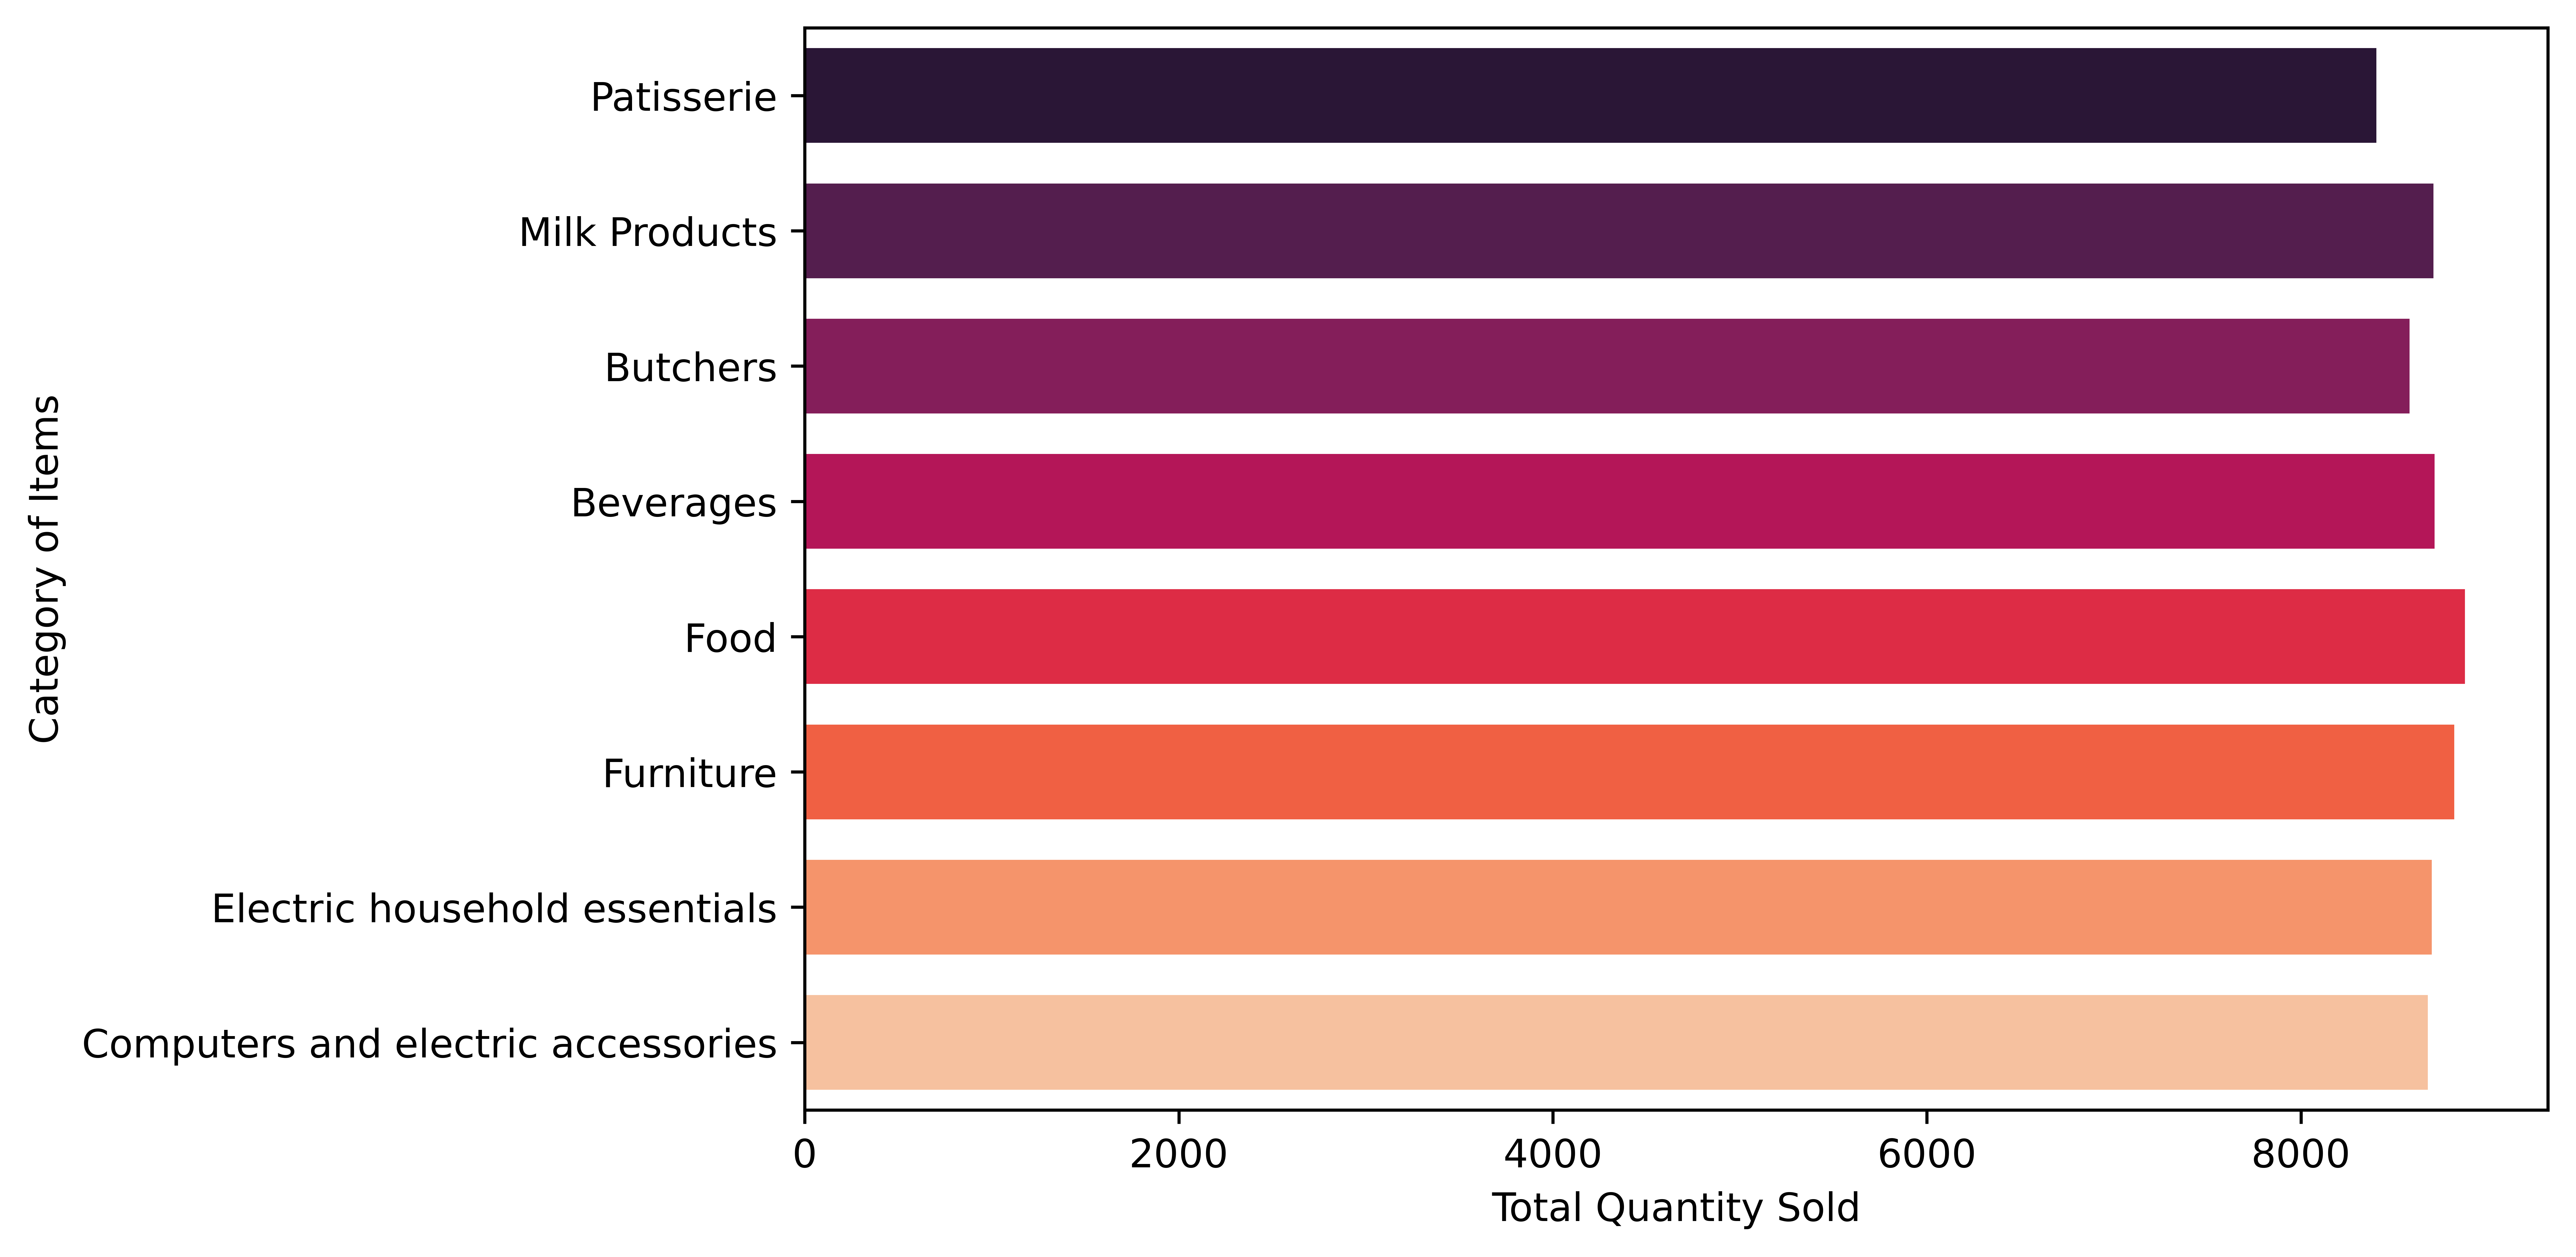

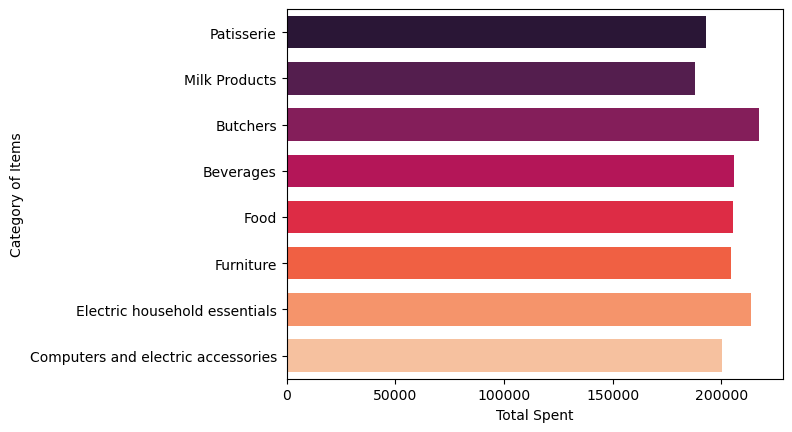

In [128]:

print(df.groupby('Category')[['Quantity','Total Spent']].agg(['sum','mean']))

plt.figure(figsize=(8,5),dpi=1000)
sns.barplot(df,y='Category',x='Quantity',estimator=sum,hue='Category',palette='rocket',errorbar=None, width=0.7,saturation=1)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category of Items')
plt.show()

sns.barplot(df,y='Category',x='Total Spent',estimator=sum,hue='Category',palette='rocket',errorbar=None, width=0.7,saturation=1)
plt.ylabel('Category of Items')
plt.show()



# 2. Customer Behavior
🧍 Who are the top spending customers?

🔁 How frequently do customers shop?

🧾 Are certain payment methods preferred by high-value customers?

In [129]:
print(df.head().to_string())
# print(df.groupby('Customer ID')['Total Spent'].agg('sum'))
print("_____________________________________________________________________________________",end="\n\n")

###################################### TOP SPENDING CUSTOMERS ##########################################

total_spent_by_each_cust=df.groupby('Customer ID')['Total Spent'].agg('sum')
print(f'The customer with the highest spent of {total_spent_by_each_cust.max()} is {total_spent_by_each_cust.idxmax()}')

# droping CUST 24 to get 2nd max
drop_C24=total_spent_by_each_cust.drop('CUST_24',axis=0)
print(f'The customer with the 2nd highest spent of {drop_C24.max()} is {drop_C24.idxmax()}')

# droping CUST 24 to get 2nd max
drop_C08=drop_C24.drop('CUST_08',axis=0)
print(f'The customer with the 3rd highest spent of {drop_C08.max()} is {drop_C08.idxmax()}')

# least spent customer
print(f'The customer with the least spent of {drop_C08.min()} is {drop_C08.idxmin()}')

print(f'The average total spent of each customer is {total_spent_by_each_cust.mean()} ')

print("_____________________________________________________________________________________",end="\n\n")


  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date  Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08              True
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23              True
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05             False
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07              True
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02             False
__________________________________________________________

In [130]:
########################## How frequently do customers shop? #####################
COl_of_cutomer_freq=df.groupby('Customer ID')['Price Per Unit'].agg('count')
print(f'On an avg customer bought something {COl_of_cutomer_freq.mean()} times with a standard deviaton of {COl_of_cutomer_freq.std():.2f},\n the customer *{COl_of_cutomer_freq.idxmax()}* is the most frequet with purchasing of items {COl_of_cutomer_freq.max()} times') 

On an avg customer bought something 503.0 times with a standard deviaton of 21.16,
 the customer *CUST_05* is the most frequet with purchasing of items 544 times


In [131]:
########################## Are certain payment methods preferred by high-value customers? #################

# print(df.groupby(['Customer ID','Payment Method'])['Total Spent'].count())

#''''Making a DF of customer if with their payment methods and total times the paid through it '''#
x=(df.groupby(['Customer ID','Payment Method'])['Total Spent'].count())

# locating highest value customer
print(x.loc['CUST_24'],"\n\n",x.loc['CUST_08'],"\n\n",x.loc['CUST_05'],"\n\n")
print("""      
                         ___Payment Method Of CUSTOMER 24___
                                Cash              197
                                Credit Card       172
                                Digital Wallet    174 

                         ___Payment Method Of CUSTOMER 08___
                                Cash              180
                                Credit Card       186
                                Digital Wallet    167
 

                        ___Payment Method Of CUSTOMER 05___

                                Cash              182
                                Credit Card       201
                                Digital Wallet    161
""")

Payment Method
Cash              197
Credit Card       172
Digital Wallet    174
Name: Total Spent, dtype: int64 

 Payment Method
Cash              180
Credit Card       186
Digital Wallet    167
Name: Total Spent, dtype: int64 

 Payment Method
Cash              182
Credit Card       201
Digital Wallet    161
Name: Total Spent, dtype: int64 


      
                         ___Payment Method Of CUSTOMER 24___
                                Cash              197
                                Credit Card       172
                                Digital Wallet    174 

                         ___Payment Method Of CUSTOMER 08___
                                Cash              180
                                Credit Card       186
                                Digital Wallet    167
 

                        ___Payment Method Of CUSTOMER 05___

                                Cash              182
                                Credit Card       201
                         

Payment Method  Cash  Credit Card  Digital Wallet
Customer ID                                      
CUST_05          182          201             161
CUST_08          180          186             167
CUST_24          197          172             174


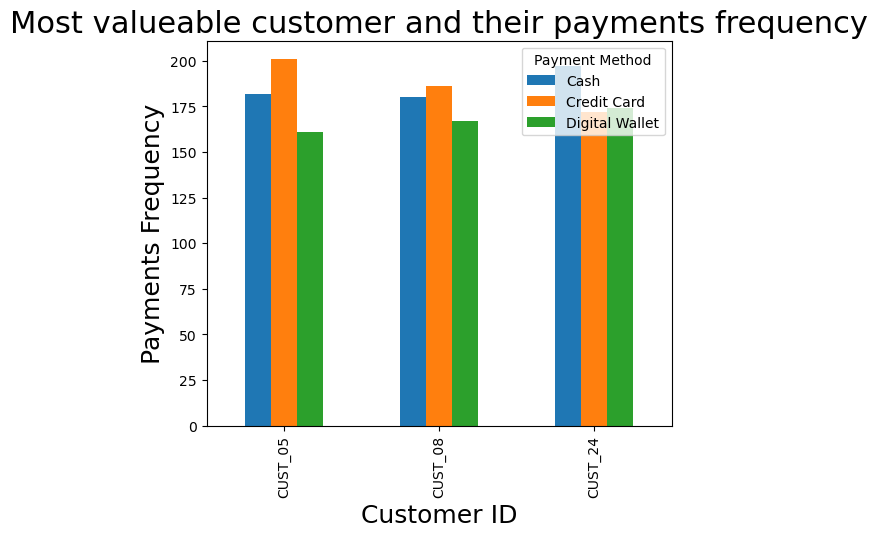

In [132]:
# FOR VISUAIZING 
# creatin df for different payment methods by most valueable customer
# print(df.groupby(['Customer ID','Payment Method'])["Total Spent"].agg('count'))
CUST_with_DIff_pay_meth=df.groupby(['Customer ID','Payment Method'])["Total Spent"].agg('count')
CUST_with_DIff_pay_meth.drop(['CUST_01','CUST_02','CUST_03','CUST_04','CUST_06','CUST_07','CUST_09','CUST_10','CUST_25','CUST_11','CUST_12','CUST_13','CUST_14','CUST_15','CUST_16','CUST_17','CUST_18','CUST_19','CUST_20','CUST_21','CUST_22','CUST_23'],axis=0,inplace=True)
# print(CUST_with_DIff_pay_meth)

# visualizing

df_grouped = CUST_with_DIff_pay_meth.unstack()  # Convert MultiIndex to a normal DataFrame
print(df_grouped)

# sns.barplot(df_grouped,hue='Customer ID')
df_grouped.plot(kind='bar',stacked=False,figsize=(6,5))
plt.ylabel('Payments Frequency',fontdict={'fontsize':18})
plt.xlabel('Customer ID',fontdict={'fontsize':18})
plt.title('Most valueable customer and their payments frequency',fontdict={'fontsize':22})
plt.show()

# 3. Product & Pricing Analysis
📊 Which items are most/least sold?

💡 How do discounts affect sales volume and revenue?

  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date  Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08              True
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23              True
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05             False
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07              True
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02             False


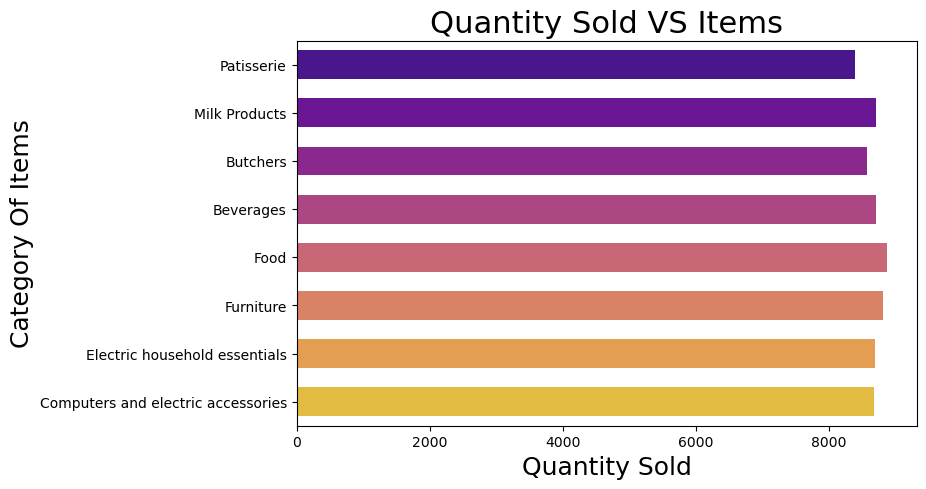

                 Quantity Total Spent
                      sum         sum
Discount Applied                     
False             34517.0    807685.0
True              34964.0    820115.5


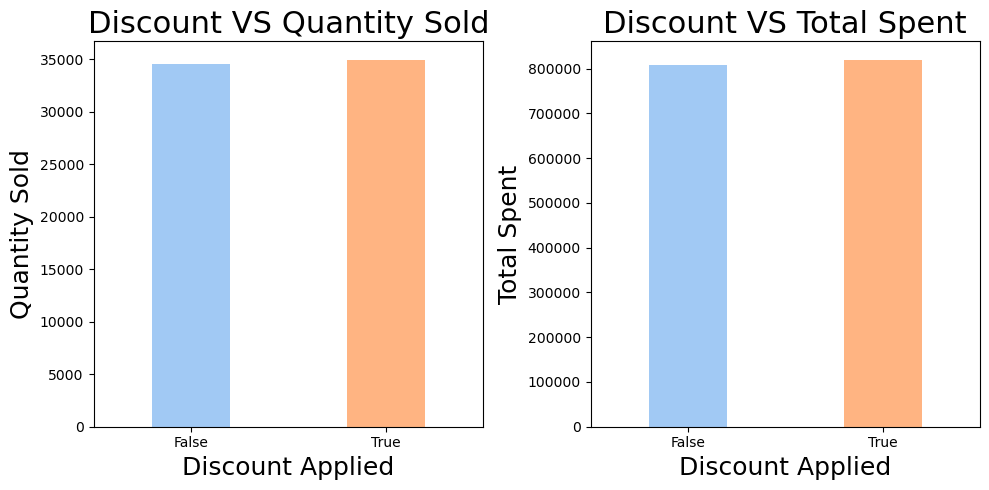

In [161]:
print(df.head().to_string())
plt.figure(figsize=(8,5))

##### which items are most sold ccan be analysed using graph
sns.barplot(df,y='Category',x='Quantity',estimator=sum,hue='Category',palette='plasma',errorbar=None ,width=0.6 )
plt.ylabel('Category Of Items',fontdict={'fontsize':18})
plt.xlabel('Quantity Sold',fontdict={'fontsize':18})
plt.title('Quantity Sold VS Items',fontdict={'fontsize':22})
plt.show()

##### How do discount affect sales volume and revenue?   
Sales_vol_rev=df.groupby('Discount Applied')[['Quantity','Total Spent']].agg(['sum'])
print(Sales_vol_rev)


plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
sns.barplot(df,x='Discount Applied',y='Quantity',hue='Discount Applied',estimator=sum,errorbar=None,palette='pastel',width=0.4,saturation=1,legend=False)
plt.ylabel('Quantity Sold',fontdict={'fontsize':18})
plt.xlabel('Discount Applied',fontdict={'fontsize':18})
plt.title('Discount VS Quantity Sold',fontdict={'fontsize':22})

plt.subplot(1,2,2)
sns.barplot(df,x='Discount Applied',y='Total Spent',hue='Discount Applied',estimator=sum,errorbar=None,palette='pastel',width=0.4,saturation=1,legend=False)
plt.ylabel('Total Spent',fontdict={'fontsize':18})
plt.xlabel('Discount Applied',fontdict={'fontsize':18})
plt.title('Discount VS Total Spent',fontdict={'fontsize':22})
plt.tight_layout()
plt.show()


# 4. Channel/Location Insights
🌍 What’s the revenue split between Online vs Offline sales?

🛒 Do in-store vs online customers behave differently (e.g. spend more, prefer certain products)?

  Transaction ID Customer ID       Category          Item  Price Per Unit  Quantity  Total Spent  Payment Method Location Transaction Date  Discount Applied
0    TXN_6867343     CUST_09     Patisserie   Item_10_PAT            18.5      10.0        185.0  Digital Wallet   Online       2024-04-08              True
1    TXN_3731986     CUST_22  Milk Products  Item_17_MILK            29.0       9.0        261.0  Digital Wallet   Online       2023-07-23              True
2    TXN_9303719     CUST_02       Butchers   Item_12_BUT            21.5       2.0         43.0     Credit Card   Online       2022-10-05             False
3    TXN_9458126     CUST_06      Beverages   Item_16_BEV            27.5       9.0        247.5     Credit Card   Online       2022-05-07              True
4    TXN_4575373     CUST_05           Food   Item_6_FOOD            12.5       7.0         87.5  Digital Wallet   Online       2022-10-02             False
Location
In-store    799779.5
Online      828021.0
Name: T

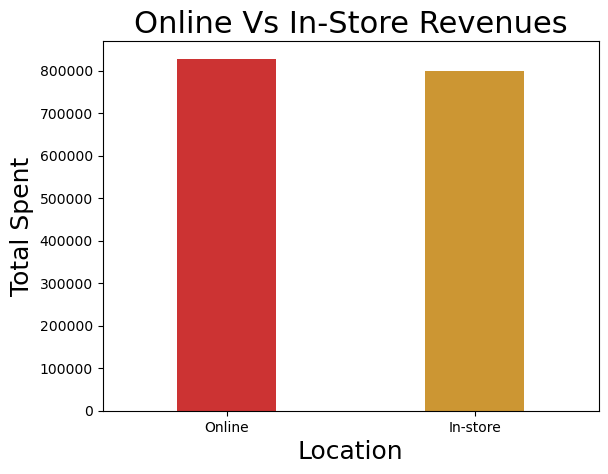

                                            Quantity                                                                                                                                                                                                 Total Spent                                                                                                                                                                                                
Customer ID                                  CUST_01 CUST_02 CUST_03 CUST_04 CUST_05 CUST_06 CUST_07 CUST_08 CUST_09 CUST_10 CUST_11 CUST_12 CUST_13 CUST_14 CUST_15 CUST_16 CUST_17 CUST_18 CUST_19 CUST_20 CUST_21 CUST_22 CUST_23 CUST_24 CUST_25     CUST_01 CUST_02 CUST_03 CUST_04 CUST_05 CUST_06 CUST_07 CUST_08 CUST_09 CUST_10 CUST_11 CUST_12 CUST_13 CUST_14 CUST_15 CUST_16 CUST_17 CUST_18 CUST_19 CUST_20 CUST_21 CUST_22 CUST_23 CUST_24 CUST_25
Category                           Location                                                           

In [198]:
print(df.head().to_string())

# Total revenue spllits between online VS offline (visualizing)
print(df.groupby('Location')['Total Spent'].agg('sum'))
sns.barplot(df,x='Location',y='Total Spent',estimator=sum,errorbar=None,hue='Location',palette=['red','orange'],saturation=0.6,width=0.4)
plt.ylabel('Total Spent',fontdict={'fontsize':18})
plt.xlabel('Location',fontdict={'fontsize':18})
plt.title('Online Vs In-Store Revenues',fontdict={'fontsize':22})
plt.show()


######🛒 Do in-store vs online customers behave differently (e.g. spend more, prefer certain products)?
# print(df.groupby(['Category','Location','Customer ID'])[['Quantity',"Total Spent"]].agg('sum').to_string())
unst=df.groupby(['Category','Location','Customer ID'])[['Quantity',"Total Spent"]].agg('sum').unstack(level=2)
print(unst.to_string())

In [208]:
print(unst.idxmax())

             Customer ID
Quantity     CUST_01                               (Furniture, In-store)
             CUST_02                                    (Food, In-store)
             CUST_03                              (Patisserie, In-store)
             CUST_04                                  (Butchers, Online)
             CUST_05                                 (Beverages, Online)
             CUST_06        (Computers and electric accessories, Online)
             CUST_07                                  (Butchers, Online)
             CUST_08                                    (Food, In-store)
             CUST_09                           (Milk Products, In-store)
             CUST_10                                (Butchers, In-store)
             CUST_11        (Computers and electric accessories, Online)
             CUST_12                                 (Beverages, Online)
             CUST_13                                      (Food, Online)
             CUST_14      